# <center> **PYTHON-13_Визуализация данных_9.Закрепление знаний**

Timur Turdalijev 
timur.trd@gmail.com

In [59]:
# Импорт библиотек
import numpy as np 
import pandas as pd 

# Импорт библиотек визуализации
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.express as px


In [60]:
# скачиваем дасет
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/churn-for-bank-customers/churn.csv


# <center> **Задача**
    
Итак, банк обращается к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов, но для этого ему необходимо, чтобы вы выяснили основные причины оттока клиентов. Иными словами, нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.

После разведывательного анализа, с целью выявления наиболее важных признаков оттока, банк сможет построить модель машинного обучения, которая будет прогнозировать уход клиента. 

## <center> **Доступный метод решения**
    
→ Вам предстоит подготовить мини-отчёт о проделанной работе в виде ноутбука, который вы предоставите ментору для проверки. Отчёт должен содержать ответы на приведённые ниже вопросы в виде графика и подробных выводов, которые вы можете сделать, исходя из него.

→ Для визуализации вы можете использовать любую из изученных библиотек.

→ Перед выполнением задания обязательно подумайте, какие признаки в данных являются числовыми, а какие — категориальными. Это поможет вам построить правильный график (ещё раз взгляните на схему выбора графика).

→ При выполнении заданий обязательно придерживайтесь критериев правильной визуализации, приведённых в юните «Искусство визуализации».

## **ЗАДАНИЯ**

* 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.
* 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.
* 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.
* 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?
* 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.
* 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.
* 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.
* 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?
* 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.
* 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

## **Помогатор:**

1. Схема выбора графика: https://viewer.diagrams.net/#P%7B%22client%22%3A1%2C%22target%22%3A%22blank%22%2C%22edit%22%3A%22_blank%22%2C%22close%22%3A1%2C%22layers%22%3A1%2C%22nav%22%3A1%2C%22highlight%22%3A%220000ff%22%7D

2. Искуство визуализации:
https://lms.skillfactory.ru/courses/course-v1:SkillFactory+DST-3.0+28FEB2021/courseware/4d5c5211c48e4964a9449babe31038db/8e0dbd37fc78481b8c205aa8a3687825/9?activate_block_id=block-v1%3ASkillFactory%2BDST-3.0%2B28FEB2021%2Btype%40vertical%2Bblock%40d8566ac3cd36455e9d50b9c7c33746e6

3. Обзор типов визуализации: 
https://lms.skillfactory.ru/courses/course-v1:SkillFactory+DST-3.0+28FEB2021/courseware/4d5c5211c48e4964a9449babe31038db/8e0dbd37fc78481b8c205aa8a3687825/

4. Искусство визуализации: 
https://lms.skillfactory.ru/courses/course-v1:SkillFactory+DST-3.0+28FEB2021/courseware/4d5c5211c48e4964a9449babe31038db/8e0dbd37fc78481b8c205aa8a3687825/

5. Выбор цвета для таблиц: https://colorscheme.ru/html-colors.html

## <center> **Знакомсво с данными**

In [61]:
df = pd.read_csv('/kaggle/input/churn-for-bank-customers/churn.csv')
print("DF shape:", df.shape)

print("\nValue counts:")
df.value_counts()


DF shape: (10000, 14)

Value counts:


RowNumber  CustomerId  Surname     CreditScore  Geography  Gender  Age  Tenure  Balance    NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
1          15634602    Hargrave    619          France     Female  42   2       0.00       1              1          1               101348.88        1         1
6671       15667932    Bellucci    758          Spain      Female  43   10      0.00       2              1          1               55313.44         0         1
6664       15766185    She         850          Germany    Male    31   4       146587.30  1              1          1               89874.82         0         1
6665       15667632    Birdseye    703          France     Female  42   7       0.00       2              0          1               72500.68         0         1
6666       15599024    Hope        506          Spain      Male    32   8       0.00       2              0          1               182692.80        0         1
                                 

help(df)

In [62]:
print('\nПроцентный список пропущенных данных:\n')
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


Процентный список пропущенных данных:

RowNumber - 0%
CustomerId - 0%
Surname - 0%
CreditScore - 0%
Geography - 0%
Gender - 0%
Age - 0%
Tenure - 0%
Balance - 0%
NumOfProducts - 0%
HasCrCard - 0%
IsActiveMember - 0%
EstimatedSalary - 0%
Exited - 0%


In [63]:
print("\nТипы данных:\n")
df.dtypes.value_counts()


Типы данных:



int64      9
object     3
float64    2
dtype: int64

In [64]:
print("\nТип данных object:\n")
df.dtypes[df.dtypes=='object']


Тип данных object:



Surname      object
Geography    object
Gender       object
dtype: object

In [65]:
print("\nТип данных int64:\n")
df.dtypes[df.dtypes=='int64']


Тип данных int64:



RowNumber         int64
CustomerId        int64
CreditScore       int64
Age               int64
Tenure            int64
NumOfProducts     int64
HasCrCard         int64
IsActiveMember    int64
Exited            int64
dtype: object

In [66]:
print("\nТип данных float64:\n")
df.dtypes[df.dtypes=='float']


Тип данных float64:



Balance            float64
EstimatedSalary    float64
dtype: object

df.nunique(dropna=False)

In [67]:
print("\nОтбор нечисловых колонок:\n")
hotels_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = hotels_non_numeric.columns.values
print(non_numeric_cols)


Отбор нечисловых колонок:

['Surname' 'Geography' 'Gender']


In [68]:
print("\nОтбор числовых колонок:\n")
hotels_numeric = df.select_dtypes(include=[np.number])
numeric_cols = hotels_numeric.columns.values
print(numeric_cols)


Отбор числовых колонок:

['RowNumber' 'CustomerId' 'CreditScore' 'Age' 'Tenure' 'Balance'
 'NumOfProducts' 'HasCrCard' 'IsActiveMember' 'EstimatedSalary' 'Exited']


## <center> **Выполнение задания**

**1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.**


0 - лояльный клиент | 1 - ушедшый клиент



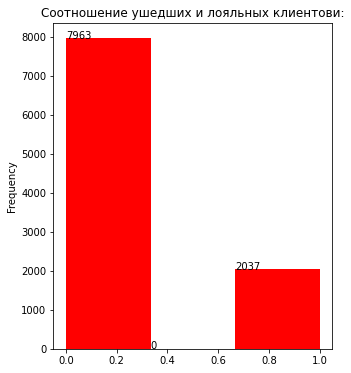

In [69]:
exited_df = df["Exited"]
print('\n0 - лояльный клиент | 1 - ушедшый клиент\n')
ax = exited_df.plot(
    kind='hist',
    figsize=(5, 6),
    title='Соотношение ушедших и лояльных клиентови:',
    color = 'red',
    bins=3
);

for i in ax.patches:
    ax.annotate('%1.0f'%i.get_height(), (i.get_x(), i.get_height()))
plt.show()

In [70]:
print('\nСоотношение ушедших и лояльных клиентов:\n')
print('\n0 - лояльный клиент | 1 - ушедшый клиент')
exited_df.value_counts()


Соотношение ушедших и лояльных клиентов:


0 - лояльный клиент | 1 - ушедшый клиент


0    7963
1    2037
Name: Exited, dtype: int64

**2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.**

In [71]:
balance_2500 = df[df['Balance'] >=2500]['Balance']
display(balance_2500)

1        83807.86
2       159660.80
4       125510.82
5       113755.78
7       115046.74
          ...    
9991     88381.21
9993    155060.41
9996     57369.61
9998     75075.31
9999    130142.79
Name: Balance, Length: 6383, dtype: float64

In [72]:
balance = balance_2500 / 1000 # делим на 1000, чтобы уьрать лишнюю информацию 
balance.describe()

count    6383.000000
mean      119.827494
std        30.095056
min         3.768690
25%       100.181975
50%       119.839690
75%       139.512290
max       250.898090
Name: Balance, dtype: float64

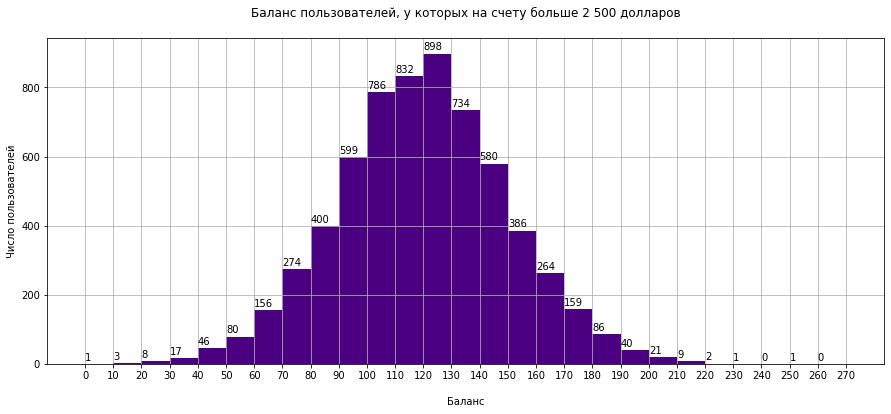

In [73]:
fig, ax = plt.subplots(figsize=(15, 6)) # настройка размеров
ax.hist(balance
        ,bins= range(0, 280, 10) # 0 диапозон / 300 заканчивается диапозон / 2 шаг
       ,align='mid'
        ,color = 'Indigo'
       )
ax.xaxis.set_major_locator(plt.IndexLocator(base = 10, offset = 0)) # подписи осей 10 - шаг / 0 - с чего старт
ax.grid()
for i in ax.patches:
    ax.annotate('%1.0f'%(i.get_height()), (i.get_x(), i.get_height()+10))
plt.title("Баланс пользователей, у которых на счету больше 2 500 долларов\n")
plt.xlabel("\nБаланс")
plt.ylabel("Число пользователей")
plt.show()

In [74]:
print("\nОт 100 и до 140:\n")
print(786+832+898+734)


От 100 и до 140:

3250


In [75]:
print("Число клиентов получающих от 2500$: ")
balance2 = df['Balance'] >=2500
balance2.sum()


Число клиентов получающих от 2500$: 


6383

**Итоги:**
* Более 2 500 USD получают - 6383 клиента
* Из них мин. значение - 3 768 USD
* Из них макс. значение - 250 898 USD 
* Самое большое число клиентов (898 ед.) имеют в диарозоне 120 - 130 тысяч USD
* Большинство имебт а счету в диапозоне от 110 - 140 тысяч - 3250 ед.

**Выводф:** 
* Средний класс это от 110 000 USD и до 140 000 USD

**3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.**

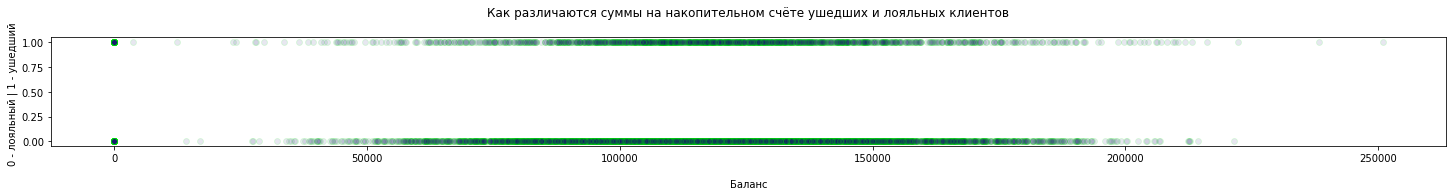

In [76]:
fig, ax = plt.subplots(figsize=(25, 2))
ax, plt.scatter(x = df['Balance']
            ,y = df['Exited']
            ,color = "MidnightBlue"
            ,edgecolors = "Lime"
            ,linewidths = 1
            ,alpha = 0.1
            
           )
plt.title("Как различаются суммы на накопительном счёте ушедших и лояльных клиентов\n")
plt.xlabel("\nБаланс")
plt.ylabel("0 - лояльный | 1 - ушедший ")
plt.show()

* Ушедших и лояльных клиентов суммы слабо различаются. 
* У ушедших клиентов видно наибольшые и наименьшие суммы.
* Ушедшие клиентов основном баланс от ~80 000 USD до ~170 000 USD.
* У лояльных клиентов основная сумма от ~40 000 USD и до ~200 000 USD.
* Причины оттока клиента можен очень быть разнообразный начианая от перехода к конкурентам, и заканчивая переходом в мир иной.

**4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?**

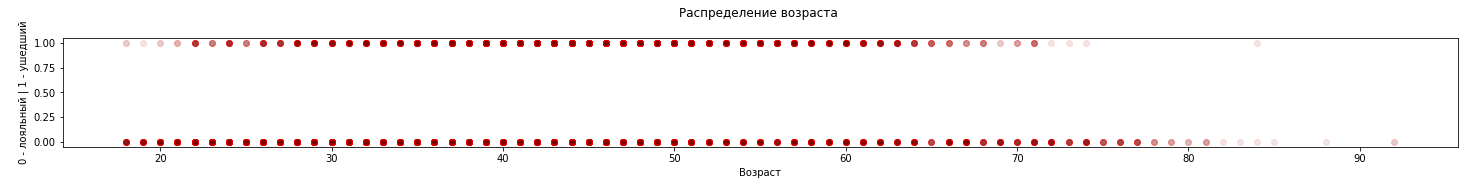

In [77]:
fig, ax = plt.subplots(figsize=(25, 2))
ax, plt.scatter(x = df['Age']
            ,y = df['Exited']
            ,color = "Maroon"
            ,edgecolors = "Red"
            ,linewidths = 1
            ,alpha = 0.1
            
           )
plt.title("Распределение возраста \n")
plt.xlabel("Возраст")
plt.ylabel("\n0 - лояльный | 1 - ушедший")
plt.show()

* Основном уходят клиенты от 23 и д 68 лет.
* Динами лоялных клиентов - стабильна на протяжении всего жизненного цикла клиента.


**5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.**

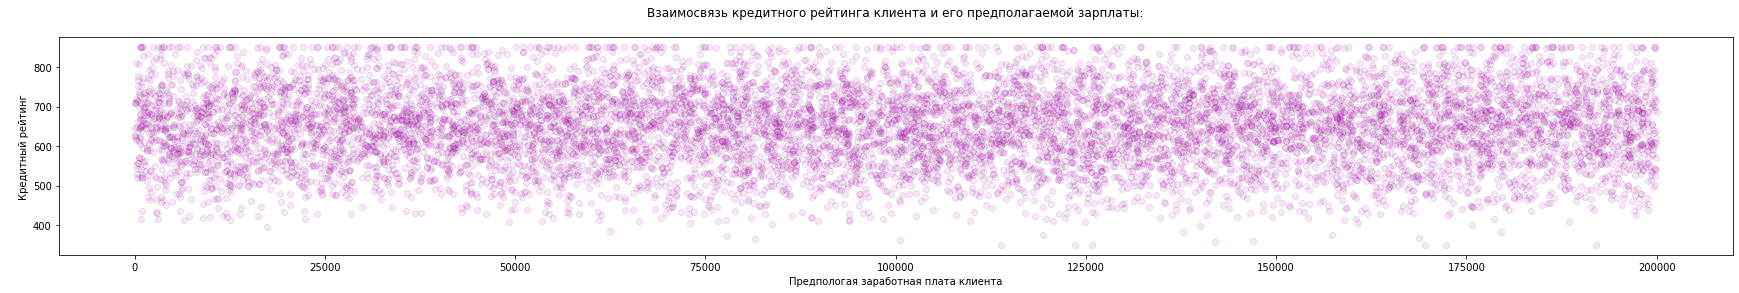

In [78]:
fig, ax = plt.subplots(figsize=(30, 4))
ax, plt.scatter(x = df['EstimatedSalary']
            ,y = df['CreditScore']
            ,color = "Fuchsia"
            ,edgecolors = "Black"
            ,linewidths = 1
            ,alpha = 0.1
            
           )
plt.title("Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты:\n")
plt.xlabel("Предпологая заработная плата клиента")
plt.ylabel("\nКредитный рейтинг")
plt.show()

Взаимосвязи не вижу

In [79]:
df_copy = df
df_copy['New_EST+CRED'] = df['EstimatedSalary'] + df['CreditScore']

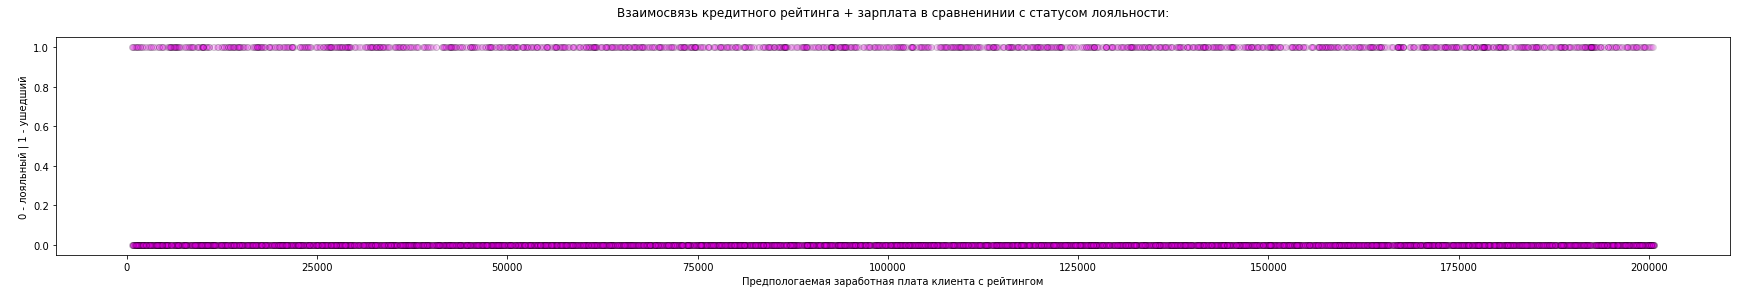

In [80]:
fig, ax = plt.subplots(figsize=(30, 4))
ax, plt.scatter(x = df_copy['New_EST+CRED']
            ,y = df_copy['Exited']
            ,color = "Fuchsia"
            ,edgecolors = "Black"
            ,linewidths = 1
            ,alpha = 0.1
            
           )
plt.title("Взаимосвязь кредитного рейтинга + зарплата в сравненинии с статусом лояльности:\n")
plt.xlabel("Предпологаемая заработная плата клиента с рейтингом")
plt.ylabel("\n0 - лояльный | 1 - ушедший")
plt.show()

**Выводы:**
* Явную взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты связи не вижу.

**6.Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.**

Text(0.5, 1.0, 'Famale & Male')

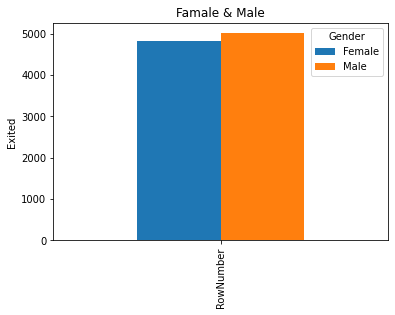

In [81]:
df_bar = df[df['Gender'].isin(['Male', 'Female']) 
            & (df['Exited'])].pivot_table(values='RowNumber', columns= 'Gender', aggfunc= 'mean')
df_bar.plot(kind= 'bar')
plt.ylabel('Exited')
plt.title('Famale & Male')

**Подсказка**

Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).

**7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Отток клиентов зависит от числа приобретённых у банка услуг')

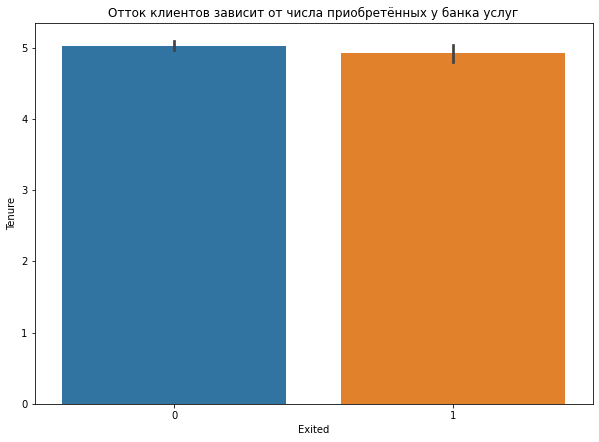

In [82]:
fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(df['Exited'],
    data=df,
    x='Exited',
    y='Tenure',
)
barplot.set_title('Отток клиентов зависит от числа приобретённых у банка услуг')

**8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?**


Есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)



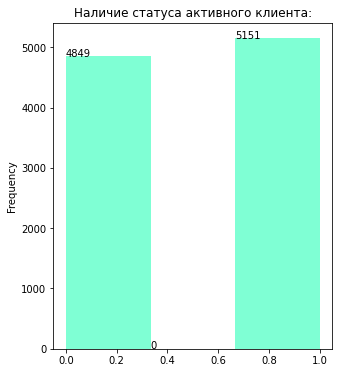

In [83]:
exited_df = df["IsActiveMember"]
print('\nЕсть ли у клиента статус активного клиента банка (1 — да, 0 — нет)\n')
ax = exited_df.plot(
    kind='hist',
    figsize=(5, 6),
    title='Наличие статуса активного клиента:',
    color = 'Aquamarine',
    bins=3
);

for i in ax.patches:
    ax.annotate('%1.0f'%i.get_height(), (i.get_x(), i.get_height()))
plt.show()

**9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.**

In [84]:
#Сгруппируем данные по странам и рассчитаем среднее значение по полю Exited, это и будет доля ушедших клиентов
choropleth_data = df.groupby(['Geography'])['Exited'].mean()
print(choropleth_data)

fig = px.choropleth(
    data_frame=choropleth_data, 
    locations=choropleth_data.index, 
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Exited", #от чего зависит цвет
    range_color=[0, 1], #диапазон цвета, доли находятся в интервале от 0 до 1
    title='Доля ушедщих клиентов по странам', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='greens' #палитра цветов
)
fig.show()

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64


**10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.**

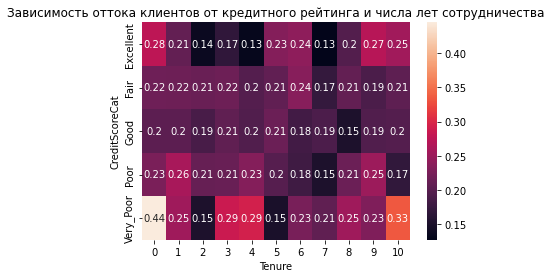

In [85]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 851:
        return "Top"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score < 300:
        return "Deep"

df['CreditScoreCat'] = df['CreditScore'].apply(get_credit_score_cat)
pivot = df.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure'
)
fig = plt.figure()
ax = sns.heatmap(data=pivot, annot=True);
ax.set_title('Зависимость оттока клиентов от кредитного рейтинга и числа лет сотрудничества');


**Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.**

**На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.**

Уходят чаще всего очень очень бедные клиенты. Самый высокий показатель до первого года.